In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [74]:
df = pd.read_csv('/content/Customers.csv')

In [75]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [76]:
print("Summary Statistics:")
print(df.describe(include='all'))

Summary Statistics:
         CustomerID  Gender          Age  Annual Income ($)  \
count   2000.000000    2000  2000.000000        2000.000000   
unique          NaN       2          NaN                NaN   
top             NaN  Female          NaN                NaN   
freq            NaN    1186          NaN                NaN   
mean    1000.500000     NaN    48.960000      110731.821500   
std      577.494589     NaN    28.429747       45739.536688   
min        1.000000     NaN     0.000000           0.000000   
25%      500.750000     NaN    25.000000       74572.000000   
50%     1000.500000     NaN    48.000000      110045.000000   
75%     1500.250000     NaN    73.000000      149092.750000   
max     2000.000000     NaN    99.000000      189974.000000   

        Spending Score (1-100) Profession  Work Experience  Family Size  
count              2000.000000       1965      2000.000000  2000.000000  
unique                     NaN          9              NaN          NaN  
t

<Figure size 1200x600 with 0 Axes>

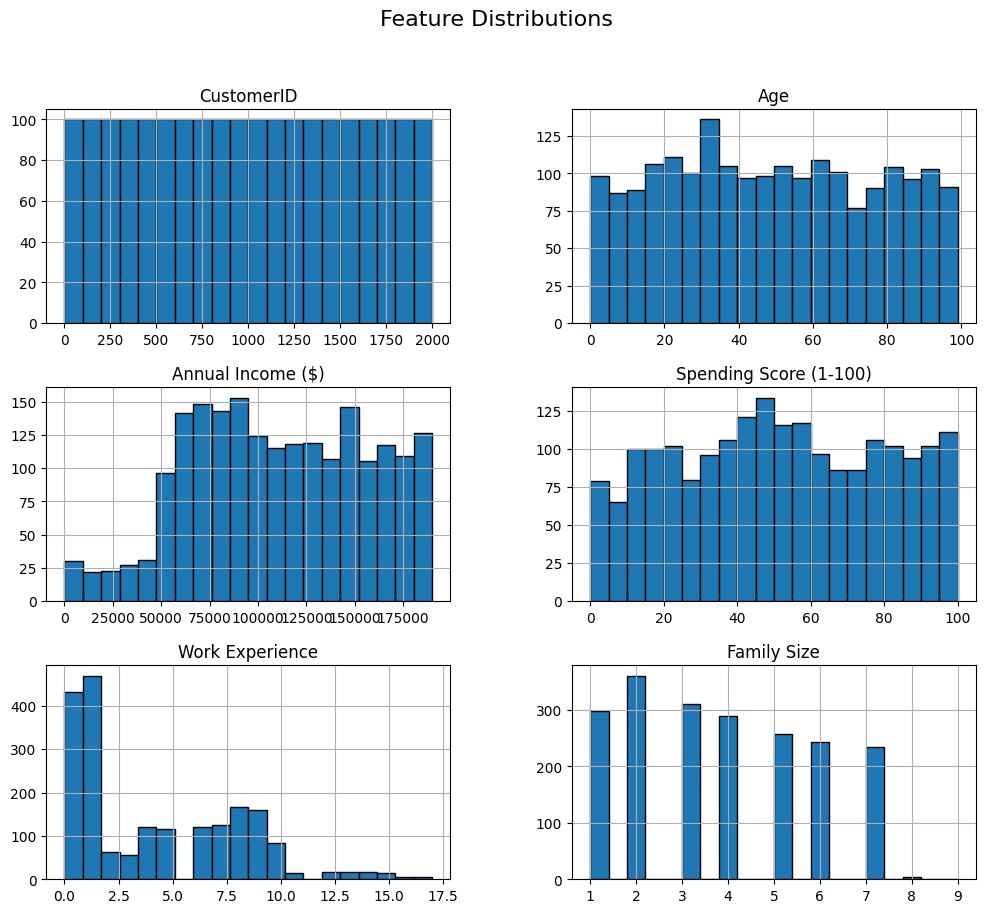

In [77]:
plt.figure(figsize=(12,6))
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [78]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Profession'] = encoder.fit_transform(df['Profession'])

In [79]:
df.fillna(df.median(), inplace=True)

In [80]:
scaler = StandardScaler()
df[['Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']] = scaler.fit_transform(
    df[['Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']])

In [81]:
df['Spending Category'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 33, 66, 100], labels=["Low", "Medium", "High"])
df['Spending Category'] = encoder.fit_transform(df['Spending Category'])

In [82]:
X = df.drop(columns=['CustomerID', 'Spending Score (1-100)', 'Spending Category'])
y = df['Spending Category']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
y_pred = model.predict(X_test)

In [86]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       200
           1       0.47      0.47      0.47       200

    accuracy                           0.47       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.47      0.47      0.47       400

Accuracy Score: 0.47


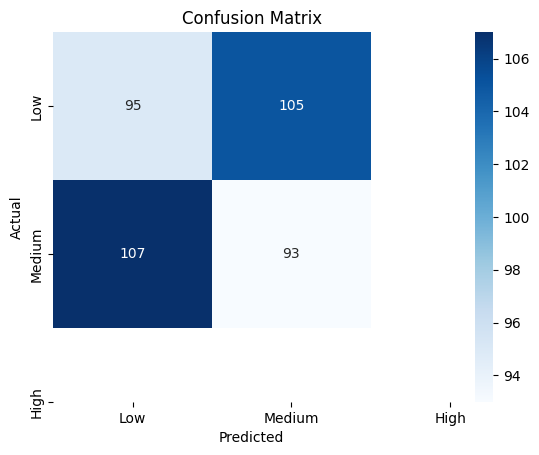

In [87]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()